# Curso: Introducción a la inteligencia artificial
    
    Docente: Andrés Mauricio Castillo Robles

# Integrantes:

    Christian Camilo Taborda Campiño - 1632081-3743
    Cristian Camilo Vallecilla Cuellar - 1628790-3743
    Santiago Hernández Arias - 1631281-3743

# Problema de clasificación: Detección de enfermedades del corazón

En el siguiente proyecto se utilizará un conjunto de datos con características de pacientes enfermos y sanos del corazón, de manera que se puedan entrenar tres modelos: Árbol de decisión, Naive Bayes y Red Neuronal, con el propósito de emplear el aprendizaje de máquina para realizar predicciones con la mayor precisión posible.

# Importación de librerías a utilizar:

In [644]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from string import ascii_uppercase

# Escuchamos el directorio con la base de datos:

In [645]:
import os
print(os.listdir("../Proyecto Final IA/Datos"))

['heart.csv']


# Leemos la base de datos e imprimimos las primeras 5 filas (Cabecera):

In [646]:
df = pd.read_csv("../Proyecto Final IA/Datos/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Atributos:

- age: Edad en años del paciente.
- sex: Género del paciente (1 = Masculino, 0 = Femenino).
- cp: Tipo de dolor en el pecho (0 = Asintomático, 1 = Angina atípica, 2 = Dolor no anginal, 3 = Angina típica).
- trestbps: Presión arterial en reposo al ingresar al hospital (Unidad mm/Hg).
- chol: Colesterol sérico (Unidad mm/dl).
- fbs: Azúcar en la sangre en ayunas (1 si es mayor a 120 mg/dl, 0 en caso contrario).
- restecg: Resultados electrocardiográficos en reposo (0 = Posible hipertrofia ventricular izquierda, 1 = Normal,   2 = Anormalidad en la onda ST-T).
- thalach: Máxima frecuencia cardiaca alcanzada.
- exang: Angina inducida por ejercicio (1 en caso positivo, 0 en caso contrario).
- oldpeak: Depresión del segmento ST inducida por ejercicio relativo al descanso.
- slope: Pendiente del pico de ejercicio en el segmento ST (0 = Bajando, 1 = Plana, 2 = Subiendo).
- ca: Número de vasos sanguíneos principales coloreados por flourosopía (0, 1, 2 o 3).
- thal: Talasemia (1 = Defecto fijo, 2 = Normal, 3 = Defecto reversible).
- target: Indicador de enfermedad del corazón (1 en caso positivo, 0 en caso contrario).


# Separación de variables:

<h3>
    Numéricas
</h3>
<div>
    <pre>
        - age 
        - trestbps 
        - chol 
        - thalach 
        - oldpeak 
    </pre>
</div>
<h3>
    Categóricas
</h3>
<div>
    <pre>
        - sex 
        - cp 
        - fbs 
        - restecg 
        - exang 
        - slope 
        - ca 
        - thal 
        - target 
    </pre>
</div>

# Histogramas para variables numéricas:

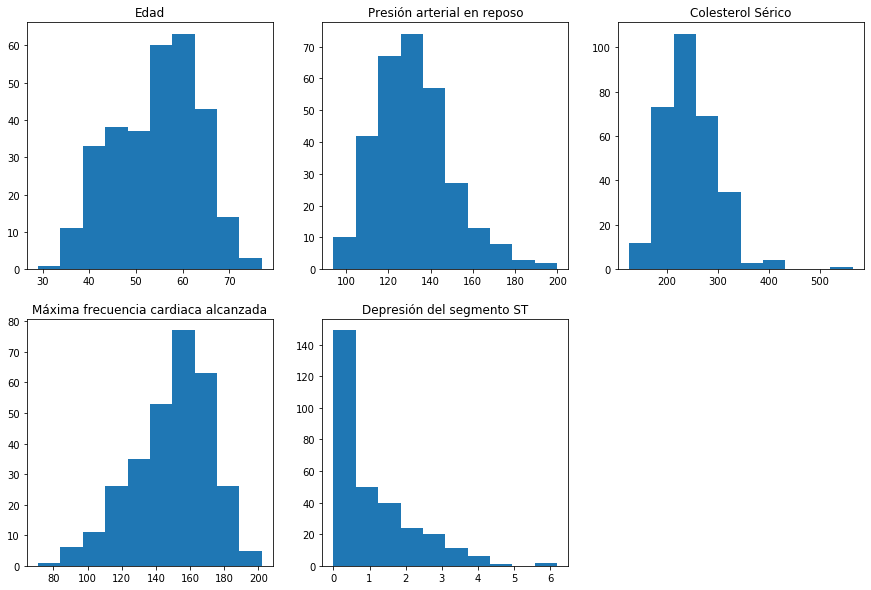

In [647]:
# Conteo para la variable 'age':
ageCounts, ageBins = np.histogram(df["age"])

# Conteo para la variable 'trestbps':
trestbpsCounts, trestbpsBins = np.histogram(df["trestbps"])

# Conteo para la variable 'chol':
cholCounts, cholBins = np.histogram(df["chol"])

# Conteo para la variable 'thalach':
thalachCounts, thalachBins = np.histogram(df["thalach"])

# Conteo para la variable 'oldpeak':
oldpeakCounts, oldpeakBins = np.histogram(df["oldpeak"])

plt.figure(figsize = (15,10))

# Diagrama para la variable 'age':
plt.subplot(2, 3, 1)
plt.hist(ageBins[:-1], ageBins, weights = ageCounts)
plt.title('Edad')

# Diagrama para la variable 'trestbps':
plt.subplot(2, 3, 2)
plt.hist(trestbpsBins[:-1], trestbpsBins, weights = trestbpsCounts)
plt.title('Presión arterial en reposo')

# Diagrama para la variable 'chol':
plt.subplot(2, 3, 3)
plt.hist(cholBins[:-1], cholBins, weights = cholCounts)
plt.title('Colesterol Sérico')

# Diagrama para la variable 'thalach':
plt.subplot(2, 3, 4)
plt.hist(thalachBins[:-1], thalachBins, weights = thalachCounts)
plt.title('Máxima frecuencia cardiaca alcanzada')

# Diagrama para la variable 'oldpeak':
plt.subplot(2, 3, 5)
plt.hist(oldpeakBins[:-1], oldpeakBins, weights = oldpeakCounts)
plt.title('Depresión del segmento ST')

plt.show()

# Diagramas de tortas para las variables categóricas:

Text(0.5, 1.0, 'Enfermedad detectada')

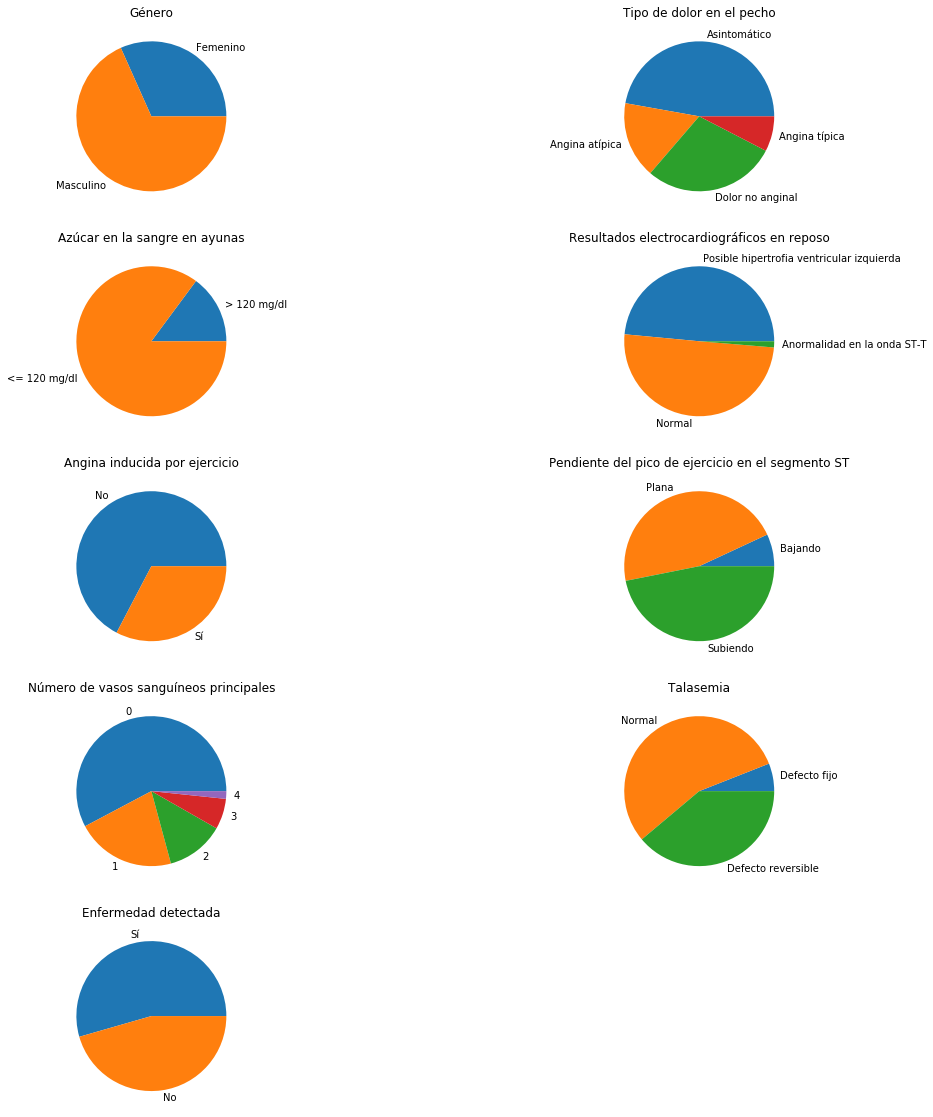

In [648]:
plt.figure(figsize = (18,20))

#Diagrama para la variable 'sex':
plt.subplot(5, 2, 1)
categorias = ["Femenino", "Masculino"]
conteo = [df["sex"][df["sex"] == 0].count(), df["sex"][df["sex"] == 1].count()]
plt.pie(conteo, labels = categorias)
plt.title('Género')

#Diagrama para la variable 'cp': 
plt.subplot(5, 2, 2)
categorias = ["Asintomático", "Angina atípica", "Dolor no anginal", "Angina típica"]
conteo = [df["cp"][df["cp"] == 0].count(), df["cp"][df["cp"] == 1].count(), df["cp"][df["cp"] == 2].count(), df["cp"][df["cp"] == 3].count()]
plt.pie(conteo, labels = categorias)
plt.title('Tipo de dolor en el pecho')

#Diagrama para la variable 'fbs':
plt.subplot(5, 2, 3)
categorias = ["> 120 mg/dl", "<= 120 mg/dl"]
conteo = [df["fbs"][df["fbs"] == 1].count(), df["fbs"][df["fbs"] == 0].count()]
plt.pie(conteo, labels = categorias)
plt.title('Azúcar en la sangre en ayunas')

#Diagrama para la variable 'restecg': 
plt.subplot(5, 2, 4)
categorias = ["Posible hipertrofia ventricular izquierda", "Normal", "Anormalidad en la onda ST-T"]
conteo = [df["restecg"][df["restecg"] == 0].count(), df["restecg"][df["restecg"] == 1].count(), df["restecg"][df["restecg"] == 2].count()]
plt.pie(conteo, labels = categorias)
plt.title('Resultados electrocardiográficos en reposo')

#Diagrama para la variable 'exang':
plt.subplot(5, 2, 5)
categorias = ["No", "Sí"]
conteo = [df["exang"][df["exang"] == 0].count(), df["exang"][df["exang"] == 1].count()]
plt.pie(conteo, labels = categorias)
plt.title('Angina inducida por ejercicio')

#Diagrama para la variable 'slope':
plt.subplot(5, 2, 6)
categorias = ["Bajando", "Plana", "Subiendo"]
conteo = [df["slope"][df["slope"] == 0].count(), df["slope"][df["slope"] == 1].count(), df["slope"][df["slope"] == 2].count()]
plt.pie(conteo, labels = categorias)
plt.title('Pendiente del pico de ejercicio en el segmento ST')

#Diagrama para la variable 'ca':
plt.subplot(5, 2, 7)
categorias = ["0", "1", "2", "3", "4"]
conteo = [df["ca"][df["ca"] == 0].count(), df["ca"][df["ca"] == 1].count(), df["ca"][df["ca"] == 2].count(), df["ca"][df["ca"] == 3].count(), df["ca"][df["ca"] == 4].count()]
plt.pie(conteo, labels = categorias)
plt.title('Número de vasos sanguíneos principales')

#Diagrama para la variable 'thal':
plt.subplot(5, 2, 8)
categorias = ["Defecto fijo", "Normal", "Defecto reversible"]
conteo = [df["thal"][df["thal"] == 1].count(), df["thal"][df["thal"] == 2].count(), df["thal"][df["thal"] == 3].count()]
plt.pie(conteo, labels = categorias)
plt.title('Talasemia')

#Diagrama para la variable 'target':
plt.subplot(5, 2, 9)
categorias = ["Sí", "No"]
conteo = [df["target"][df["target"] == 1].count(), df["target"][df["target"] == 0].count()]
plt.pie(conteo, labels = categorias)
plt.title('Enfermedad detectada')

# Ajuste de datos:

In [649]:
# Verificamos si hay datos tipo 'NaN':
print(df.isna().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [650]:
#Verificamos si hay datos tipo 'null':
print(df.isnull().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


- El resultado anterior indica que no hay que remover ni completar datos en nuestro conjunto de datos, sin embargo   en el atributo 'thal' se omitió el valor 0, pues en el conjunto de datos sólo hay valores 1, 2 y 3.

# Separación de datos para entrenamiento y pruebas:

In [651]:
# Creación del arreglo para características y para el objetivo:
caracteristicas = df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]].values
target = df["target"].values

# Partición del grupo de datos: 20% pruebas - 80% entrenamiento:
trainX, testX, trainY, testY = train_test_split(caracteristicas, target, test_size = 0.2)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(242, 13) (242,)
(61, 13) (61,)


# Modelo #1: Árbol de decisión 

El modelo del árbol de decisión es un modelo predictivo que busca determinar la variable objetivo del problema a partir de los demás datos del conjunto de datos, generando reglas de clasificación que dividen cada nodo en ramas subyacentes que conducen a la decisión final sobre el objetivo (hojas).

<h3>Entrenamiento del modelo</h3>

In [652]:
# Creación del árbol con profundidad máxima 6:
arbol = DecisionTreeClassifier(max_depth = 6, min_samples_split = 5, random_state = 40)

# Entrenamiento del modelo:
arbol.fit(trainX, trainY)

# Scores:
arbolScoreTrain = arbol.score(trainX, trainY)
arbolScoreTest = arbol.score(testX, testY)

# Precisión de los resultados:
print("Precisión con el conjunto de entrenamiento: \t" + str(arbolScoreTrain))
print("Precisión con el conjunto de pruebas: \t\t" + str(arbolScoreTest))

Precisión con el conjunto de entrenamiento: 	0.9545454545454546
Precisión con el conjunto de pruebas: 		0.819672131147541


- El modelo de árbol de decisión es muy inestable, su amplia diferencia entre las dos precisiones resultantes lo demuestran, tiende muy fácil al sobreajuste en la evaluación. Ajustando los niveles de profundidad encontramos que el nivel 6 es el valor más alto de profundidad que evita el sobreajuste y nos brinda una precisión bastante aceptable para el conjunto de pruebas.

<h3>Matriz de confusión</h3>

La matriz de confusión es una herramienta que nos permite determinar qué tan acertado resultó nuestra implementación, comparando los resultados reales con los que el modelo predijo, de tal forma que la diagonal de la matriz es la que nos indica una buena predicción, entre mayores sean los valores de la diagonal, más acertado resulta nuestro modelo.

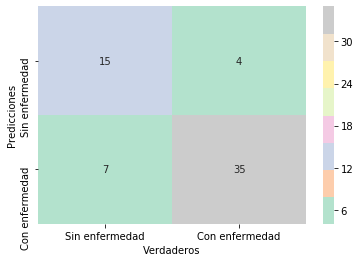

In [653]:
predicciones = arbol.predict(testX)
matrizConfusion = confusion_matrix(predicciones, testY)

clases = ['Sin enfermedad', 'Con enfermedad']

df_cm = pd.DataFrame(matrizConfusion, index = clases, columns = clases)

grafica = sns.heatmap(df_cm, cmap = 'Pastel2', annot = True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Predicciones')

grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
plt.show()

- Analizando la matriz de confusión observamos que los valores de la diagonal son dominantes, indicando que hay más aciertos que errores con cada ejecución del modelo, sin embargo la diferencia entre los números que la componen convierten al modelo en una implementación poco confiable.

<h3>Gráfica de importancias</h3>

La gráfica nos muestra la relevancia que tiene cada atributo sobre el conjunto de datos luego de entrenar nuestro modelo, permitiendo entender mejor el por qué cada uno fue seleccionado para el nodo correspondiente al que fue asignado, de manera que se jerarquicen las reglas de clasificación en cada nivel del árbol.

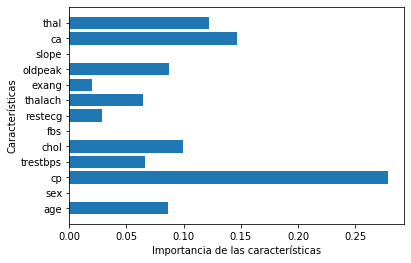

In [654]:
# Gráfica de importancias de los atributos:
C = len(caracteristicasN)
plt.barh(range(C), arbol.feature_importances_)
plt.yticks(np.arange(C), caracteristicasN)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()

- Se puede observar que el atributo que resultó con mayor importancia fue 'cp', el cual corresponde con el tipo de dolor en el pecho, seguido de 'ca', correspondiente al número de vasos sanguíneos coloreados por flourosopía. Por lo tanto 'cp' será el atributo de clasificación para la raíz del árbol.

<h3>Visualización del árbol de decisión generado</h3>

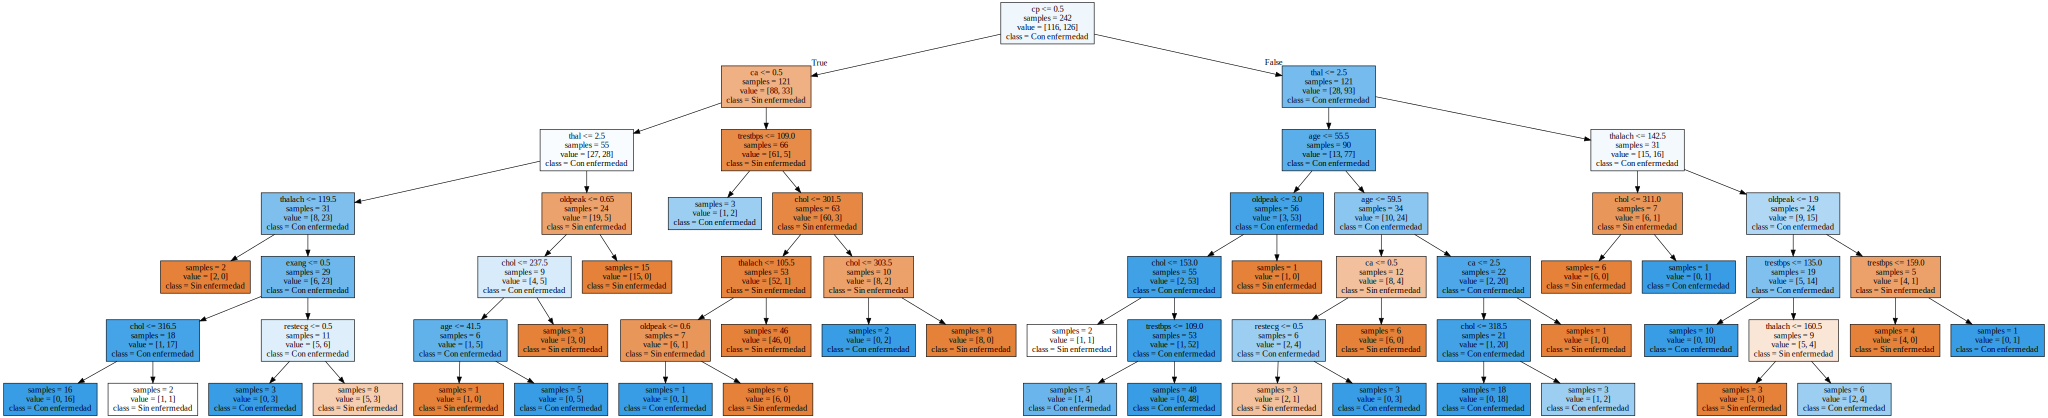

In [655]:
caracteristicasN = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
classNames = trainY.astype('str')
classNames[classNames == '0'] = 'Sin enfermedad'
classNames[classNames == '1'] = 'Con enfermedad'

export_graphviz(arbol, out_file = 'arbol.dot', class_names = classNames, feature_names = caracteristicasN, impurity = False, filled = True)

with open('arbol.dot') as F:
    dot_graph = F.read()
graphviz.Source(dot_graph)

- Al graficar el árbol de decisión podemos interpretar de manera muy sencilla el proceso seguido por la implementación del modelo, es fácil de observar el tipo de atributo que se tiene en cuenta para tomar la decisión de clasificación en cada nodo presente en el diagrama, así como también las condiciones que debe cumplir el valor de dicho atributo para seguir una rama o la otra.

# Modelo #2: Naive Bayes

El modelo de Naive Bayes es un modelo basado en el teorema de bayes, el cual simplifica el problema a niveles de independencia entre las variables predictoras, de forma que la presencia o ausencia de una característica en particular no está relacionada con la presencia o ausencia de cualquier otra, convirtiéndolo en un modelo ingenuo.

<h3>Entrenamiento del modelo</h3>

In [656]:
# Creación del modelo de Naive Bayes:
naiveBayes = GaussianNB()

# Entrenamiento del modelo:
naiveBayes.fit(trainX, trainY)

# Scores:
bayesScoreTrain = naiveBayes.score(trainX, trainY)
bayesScoreTest = naiveBayes.score(testX, testY)

# Precisión de los resultados:
print("Precisión con el conjunto de entrenamiento: \t" + str(bayesScoreTrain))
print("Precisión con el conjunto de pruebas: \t\t" + str(bayesScoreTest))

Precisión con el conjunto de entrenamiento: 	0.8429752066115702
Precisión con el conjunto de pruebas: 		0.8360655737704918


- Como el modelo de Naive Bayes realiza una clasificación de forma directa, no hace falta un ajuste en los parámetros. Los resultados obtenidos son bastante aceptables y también presentan mucho menos lejanía entre ellos comparados con los del 
modelo anterior.

<h3>Matriz de confusión</h3>

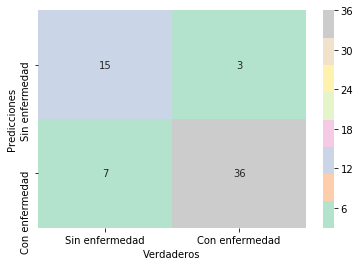

In [657]:
predicciones = naiveBayes.predict(testX)
matrizConfusion = confusion_matrix(predicciones, testY)

df_cm = pd.DataFrame(matrizConfusion, index = clases, columns = clases)

grafica = sns.heatmap(df_cm, cmap = 'Pastel2', annot = True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Predicciones')

grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
plt.show()

- Analizando la matriz de confusión observamos que los valores de la diagonal siguen siendo dominantes, pero con un mayor ajuste respecto a la diferencia de magnitud entre los mismos.

# Modelo #3: Red Neuronal

En un modelo de red neuronal, cada neurona está conectada con otras a través de enlaces, donde el valor de salida de la neurona anterior es multiplicado por un valor de peso, el cual influye en el estado de activación de las neuronas adyacentes.

<h3>Entrenamiento del modelo</h3>

In [658]:
# Normalización de los datos:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

# Creación del modelo de red neuronal:
redNeuronal = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000, hidden_layer_sizes = (4, 4, 4, 4), random_state=40, verbose = True)

# Entrenamiento del modelo:
redNeuronal.fit(trainX, trainY)

# Scores:
redScoreTrain = redNeuronal.score(trainX, trainY)
redScoreTest = redNeuronal.score(testX, testY)

# Precisión de los resultados:
print("Precisión con el conjunto de entrenamiento: \t" + str(redScoresTrain))
print("Precisión con el conjunto de pruebas: \t\t" + str(redScoresTest))

Precisión con el conjunto de entrenamiento: 	0.9132231404958677
Precisión con el conjunto de pruebas: 		0.8524590163934426


- Los resultados del modelo son aceptables tanto para el conjunto de entrenamiento como para el conjunto de pruebas, la configuración de parámetros resultante fueron 4 capas ocultas con 4 neuronas cada una, así como la función de activación 'ReLU' definida como: f(x) = max(0,x), mientras que la función de optimización inicial fue 'adam', el cual es un optimizador estocástico basado en gradiente, sin embargo esta función sólo trabaja bien para conjuntos de datos grandes, del orden de mil o más ejemplos, por lo tanto al final se decidió por la función 'lbfgs', la cual converge más rápido y es más eficiente para conjuntos de datos pequeños.

<h3>Matriz de confusión</h3>

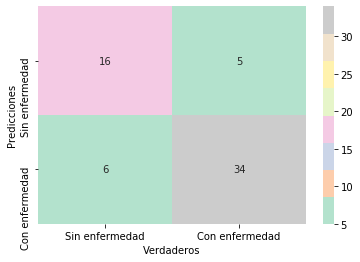

In [659]:
predicciones = redNeuronal.predict(testX)
matrizConfusion = confusion_matrix(predicciones, testY)

df_cm = pd.DataFrame(matrizConfusion, index = clases, columns = clases)

grafica = sns.heatmap(df_cm, cmap = 'Pastel2', annot = True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Predicciones')

grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
plt.show()

- La matriz de confusión también nos muestra una diagonal dominante, con números muy aceptables para ambos conjuntos de datos, se observa menos ajuste entre las dos precisiones respecto del segundo modelo, pero mayor respecto al primero.

<h3>Reporte de clasificación</h3>

In [660]:
print(classification_report(testY, predicciones, target_names = clases))

                precision    recall  f1-score   support

Sin enfermedad       0.76      0.73      0.74        22
Con enfermedad       0.85      0.87      0.86        39

      accuracy                           0.82        61
     macro avg       0.81      0.80      0.80        61
  weighted avg       0.82      0.82      0.82        61



# Comparación de los métodos utilizados:

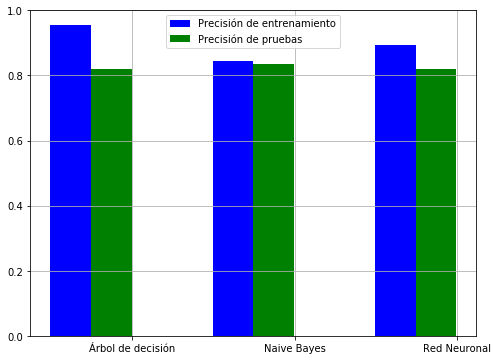

In [661]:
datos = [[arbolScoreTrain, bayesScoreTrain, redScoreTrain], [arbolScoreTest, bayesScoreTest, redScoreTest]]
x = np.arange(3)

plt.figure(figsize = (8,6))
plt.bar(x + 0.00, datos[0], color = "b", width = 0.25)
plt.bar(x + 0.25, datos[1], color = "g", width = 0.25)
plt.xticks(x + 0.38, ["Árbol de decisión","Naive Bayes","Red Neuronal"])
plt.legend(['Precisión de entrenamiento', 'Precisión de pruebas'], loc='upper center')
plt.grid()

# Conclusiones:

De los tres modelos implementados, el modelo de árbol de decisión fue el que tuvo una mayor precisión sobre el conjunto de entrenamiento, aunque también fue el que menor precisión tuvo sobre el conjunto de pruebas, demostrando así la inestabilidad del modelo, sin embargo es el modelo con la interpretación más sencilla de realizar, pues su presentación gráfica permite entender de forma intuitiva el proceso de jerarquización sobre los atributos para generar las reglas de clasificación.

El modelo de la red neuronal tiene la mayor precisión sobre el conjunto de pruebas, y la segunda más alta sobre el conjunto de entrenamiento, sus resultados son bastante aceptables, con una inestabilidad menor que la del modelo del árbol, pero su interpretación es la menos intuitiva de todas, a parte de requerir un ajuste minucioso de sus parámetros para alcanzar resultados aceptables y estables.

Finalmente tenemos el modelo de Naive Bayes, su precisión sobre el conjunto de entrenamiento es la menor de todas, y la precisión sobre el conjunto de pruebas es la segunda mejor, pero es el modelo más estable de los tres, además de no requerir un ajuste complicado de parámetros por realizar una clasificación directa.

# Método seleccionado

El método seleccionado para predecir las enfermedades del corazón es el método de Naive Bayes, pues a pesar de no ser el más preciso, es el más equilibrado, pues tiene la mayor estabilidad y facilidad de manipulación.